In [190]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:\Users\djbro\OneDrive\Desktop\The Analytics Edge\15-071-spring-2017\contents\linear-regression\assignment-2\state-data\statedata.csv")
df.head()


,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [191]:
df = df.drop(['state.abb','state.division'],axis =1)
df

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,51609,-86.7509,32.5901,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,589757,-127.2500,49.2500,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,113909,-111.6250,34.2192,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,53104,-92.2992,34.7336,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,158693,-119.7730,36.5341,California,West
5,2541,4884,0.7,72.06,6.8,63.9,166,103766,104247,-105.5130,38.6777,Colorado,West
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,5009,-72.3573,41.5928,Connecticut,Northeast
7,579,4809,0.9,70.06,6.2,54.6,103,1982,2057,-74.9841,38.6777,Delaware,South
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,58560,-81.6850,27.8744,Florida,South
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,58876,-83.3736,32.3329,Georgia,South


<AxesSubplot:xlabel='x', ylabel='y'>

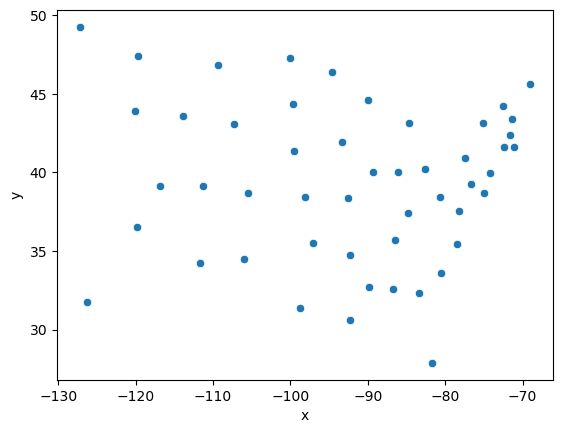

In [192]:
sns.scatterplot(data=df,x='x',y='y')

In [193]:
df.describe()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,70735.880000,72367.980000,-92.464138,39.410740
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,85327.299622,88278.006201,16.180787,4.976349
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,1214.000000,-127.250000,27.874400
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,36985.250000,37317.000000,-104.159500,35.548150
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,56222.000000,-89.900300,39.620750
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,81162.500000,83233.750000,-78.977850,43.136100
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,589757.000000,-68.980100,49.250000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    50 non-null     int64  
 1   Income        50 non-null     int64  
 2   Illiteracy    50 non-null     float64
 3   Life.Exp      50 non-null     float64
 4   Murder        50 non-null     float64
 5   HS.Grad       50 non-null     float64
 6   Frost         50 non-null     int64  
 7   Area          50 non-null     int64  
 8   state.area    50 non-null     int64  
 9   x             50 non-null     float64
 10  y             50 non-null     float64
 11  state.name    50 non-null     object 
 12  state.region  50 non-null     object 
dtypes: float64(6), int64(5), object(2)
memory usage: 5.2+ KB


<AxesSubplot:xlabel='state.region'>

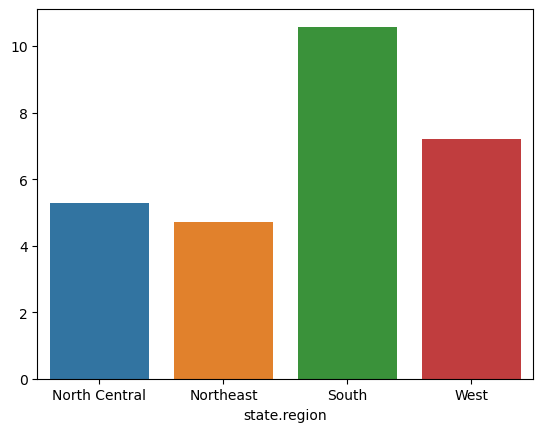

In [195]:
#Create dataframe grouped by region, look at murder rate
df_region_murder = df.groupby('state.region')['Murder'].mean()

sns.barplot(x=df_region_murder.index,y=df_region_murder.values)

<AxesSubplot:xlabel='state.region'>

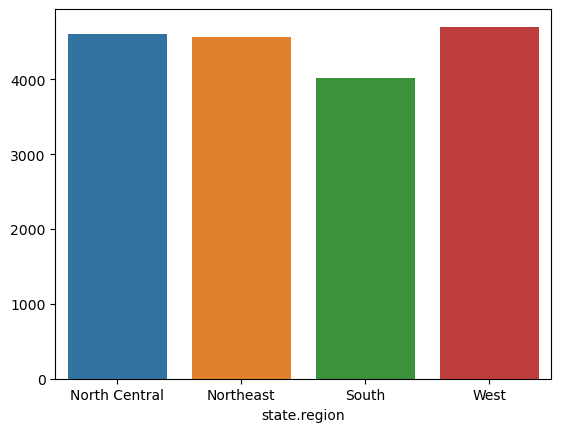

In [196]:
#Create dataframe grouped by region, look at region income
df_region_Income = df.groupby('state.region')['Income'].mean()
df_region_Income

sns.barplot(x=df_region_Income.index,y=df_region_Income.values)

<AxesSubplot:xlabel='state.region'>

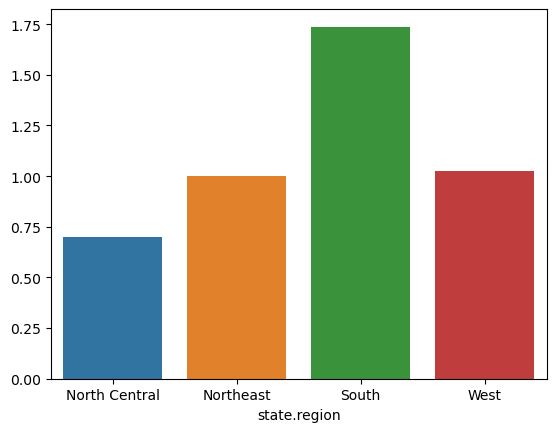

In [197]:
#Create dataframe grouped by region, look at regions illiteracy rate
df_region_Illiteracy = df.groupby('state.region')['Illiteracy'].mean()
df_region_Illiteracy

sns.barplot(x=df_region_Illiteracy.index,y=df_region_Illiteracy.values)

<AxesSubplot:xlabel='state.region'>

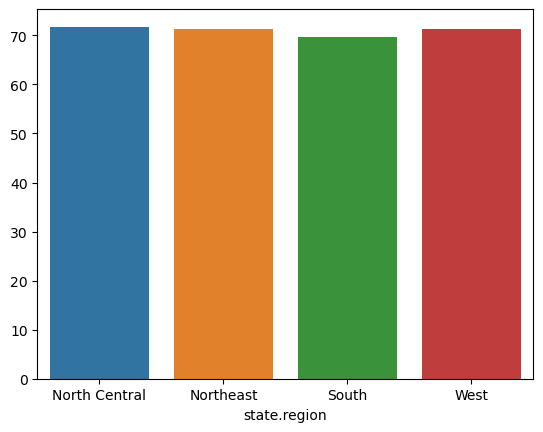

In [198]:
#Create dataframe grouped by region, look at region life expectancy
df_region_LifeExp = df.groupby('state.region')['Life.Exp'].mean()
df_region_LifeExp

sns.barplot(x=df_region_LifeExp.index,y=df_region_LifeExp.values)

In [199]:
df.corr()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
Population,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544,0.021567,0.154626,-0.171875
Income,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315,0.365618,-0.237574,0.426546
Illiteracy,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261,0.079862,0.095271,-0.732826
Life.Exp,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332,-0.109632,-0.247983,0.406655
Murder,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390,0.228794,-0.009053,-0.653628
HS.Grad,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542,0.329880,-0.556176,0.508987
Frost,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229,0.058568,0.119782,0.712842
Area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000,0.999825,-0.582648,0.184067
state.area,0.021567,0.365618,0.079862,-0.109632,0.228794,0.329880,0.058568,0.999825,1.000000,-0.575346,0.185670
x,0.154626,-0.237574,0.095271,-0.247983,-0.009053,-0.556176,0.119782,-0.582648,-0.575346,1.000000,-0.079006


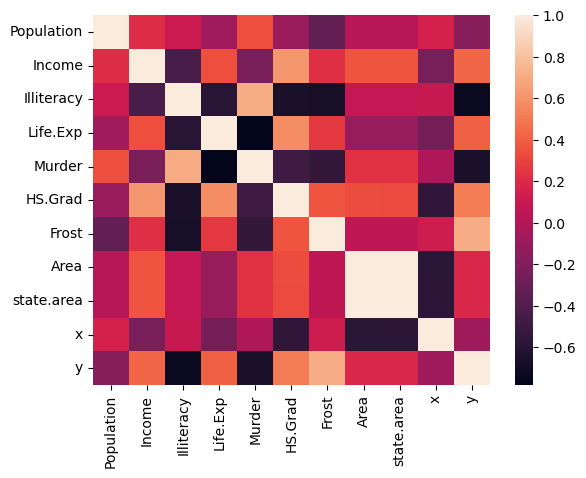

In [200]:
sns.heatmap(df.corr());

In [201]:
#create data
X = df.drop(columns=['Life.Exp','state.name','state.region'],axis=1) # independent variables
y = df['Life.Exp'] # dependent variable

In [202]:
# one-hot encoding for categorical features
#enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
#enc.fit(X)
#X = enc.transform(X)

In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  50 non-null     int64  
 1   Income      50 non-null     int64  
 2   Illiteracy  50 non-null     float64
 3   Murder      50 non-null     float64
 4   HS.Grad     50 non-null     float64
 5   Frost       50 non-null     int64  
 6   Area        50 non-null     int64  
 7   state.area  50 non-null     int64  
 8   x           50 non-null     float64
 9   y           50 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 4.0 KB


In [204]:
#X = pd.get_dummies(df, columns=['state.name','state.region'], prefix=['state','region'])
#X.head()

In [205]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create pipeline
regressor = LinearRegression()
scaler = StandardScaler() # or StandardScaler()
selector = SelectKBest(f_regression, k=2)
pipeline = Pipeline([('scaler', scaler), ('selector', selector), ('regressor', regressor)])

In [206]:
#import statsmodels.api as sm
#X_train_lm = sm.add_constant(X_train)

#lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.summary()

In [207]:
# fit and predict
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# print coefficient of determination R^2 of the prediction
print("Train R^2: ", pipeline.score(X_train, y_train))
print("Test R^2: ", pipeline.score(X_test, y_test))

Train R^2:  0.6005354160973428
Test R^2:  0.7677999646539053


In [208]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

0.5306728493750213
0.45363550925358015
0.6735246909012171


<AxesSubplot:xlabel='Life.Exp', ylabel='Count'>

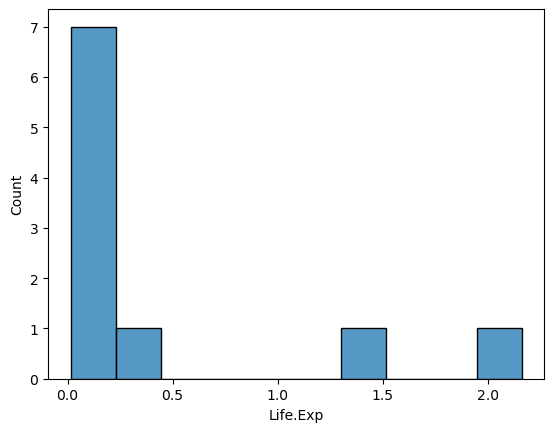

In [209]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_pred_test - y_test)**2, bins = 10)